In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import geopandas as gpd
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_parquet('C:/Users/Asus/Box/Flood Damage PredictionProject/Dataset/FemaDataWithWaterDepthStatistics2.parquet.gzip')

In [6]:
df.columns

Index(['Unnamed: 0', 'agricultureStructureIndicator', 'asOfDate',
       'basementEnclosureCrawlspaceType', 'policyCount',
       'crsClassificationCode', 'dateOfLoss', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'elevationDifference_x',
       'baseFloodElevation', 'ratedFloodZone', 'houseWorship',
       'locationOfContents', 'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'originalConstructionDate',
       'originalNBDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'totalBuildingInsuranceCoverage',
       'totalContentsInsuranceCoverage', 'yearOfLoss',
       'primaryResidenceIndicator', 'buildingDamageAmount',
       'buildingDeductibleCode', 'netBuildingPaymentAmount',
       'buil

In [7]:
#get rid of NaNs for proportionLeqOne
df = df[~df['proportionLeqOne'].isna()]


# Variables related to water depth: proportionLeqOne, relativeDamage, elevationDifference

In [8]:
df_six = df[df['waterDepth'] == 6]



In [36]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [37]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1

cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]

In [38]:
cluster_one['relativeDamage'].median()

0.8615553653876771

In [39]:
len(cluster_one) / (len(X))

0.3480618918487797

In [40]:
len(cluster_two) / (len(X))

0.6519381081512203

In [41]:
cluster_two['relativeDamage'].median()

0.10996550756557705

In [42]:
df_six['relativeDamage'].median()

0.26565696712782594

In [43]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage']]
new_labels = kmeans.predict(X_2)

In [44]:
sum(new_labels)

906358

In [45]:
len(df_zero_and_one)

974334

In [46]:
len(cluster_one)

13092

In [47]:
906358 / 974334

0.9302333696658436

# Three Variables

In [81]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [83]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1

cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]

In [84]:
cluster_one['relativeDamage'].median()

0.1100451127819548

In [85]:
cluster_two['relativeDamage'].median()

0.8618181818181818

In [86]:
df_six['relativeDamage'].median()

0.26565696712782594

In [89]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
new_labels = kmeans.predict(X_2)

In [90]:
sum(new_labels)

93971

In [91]:
len(df_zero_and_one)

974334

In [92]:
len(cluster_one)

24533

In [93]:
len(df_six)

37614

# Three Variables and Three Clusters

In [94]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [95]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]

In [96]:
cluster_one['relativeDamage'].median()

0.1091633574498177

In [97]:
cluster_two['relativeDamage'].median()

0.8968304835935204

In [98]:
cluster_three['relativeDamage'].median()

0.1377024178943243

In [99]:
df_six['relativeDamage'].median()

0.26565696712782594

In [100]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix']]
new_labels = kmeans.predict(X_2)

In [107]:
sum(new_labels == 0)

81250

In [102]:
sum(new_labels == 1)

35786

In [103]:
sum(new_labels == 2)

857298

In [105]:
len(cluster_three) / len(df_six)

0.3611687137767852

# Three Variables and Four Clusters

In [112]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [113]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [114]:
cluster_one['relativeDamage'].median()

0.9080107477000182

In [115]:
cluster_two['relativeDamage'].median()

0.11583668925409556

In [116]:
cluster_three['relativeDamage'].median()

0.14489720647980975

In [117]:
df_six['relativeDamage'].median()

0.26565696712782594

In [118]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [119]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

2    8674
3    1022
0     303
1       1
dtype: int64

In [120]:
len(cluster_three) / len(df_six)

0.3392885627691817

# Three Variables and Five Clusters

In [121]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [122]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [123]:
cluster_one['relativeDamage'].median()

0.0962512403897729

In [124]:
cluster_two['relativeDamage'].median()

0.15214155671014315

In [125]:
cluster_three['relativeDamage'].median()

0.9112426897041765

In [126]:
df_six['relativeDamage'].median()

0.26565696712782594

In [127]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [128]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

1    5920
0    2876
3     944
2     259
4       1
dtype: int64

In [133]:
len(cluster_two) / len(df_six)

0.2809060456213112

# Two Variables and Five Clusters

In [143]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [144]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [145]:
cluster_one['relativeDamage'].median()

0.660762569066186

In [146]:
cluster_two['relativeDamage'].median()

0.9304205829276448

In [147]:
cluster_three['relativeDamage'].median()

0.1046181818181818

In [148]:
df_six['relativeDamage'].median()

0.26565696712782594

In [152]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

3    9693
2    9241
1    9220
4    5303
0    4157
dtype: int64

In [149]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [150]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

0    7414
3    2586
dtype: int64

In [151]:
len(cluster_two) / len(df_six)

0.24512149731482957

# Three Variables and Six Clusters

In [153]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [154]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [155]:
cluster_one['relativeDamage'].median()

0.1174671231697031

In [156]:
cluster_two['relativeDamage'].median()

0.1042330381232565

In [157]:
cluster_three['relativeDamage'].median()

0.0886558627264061

In [158]:
df_six['relativeDamage'].median()

0.26565696712782594

In [159]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

0    9972
1    9743
4    8983
3    4315
5    2958
2    1643
dtype: int64

In [160]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [161]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

3    5977
2    2594
5     937
1     492
dtype: int64

In [162]:
len(cluster_two) / len(df_six)

0.2590258946137077

# Three Variables and Seven Clusters

In [163]:
kmeans = KMeans(n_clusters = 7, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=7, random_state=42)

In [164]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [165]:
cluster_one['relativeDamage'].median()

0.10584623175028805

In [166]:
cluster_two['relativeDamage'].median()

0.11013551741323865

In [167]:
cluster_three['relativeDamage'].median()

0.0872527472527472

In [168]:
df_six['relativeDamage'].median()

0.26565696712782594

In [169]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

4    8976
0    8166
3    7889
1    4650
6    3637
5    2989
2    1307
dtype: int64

In [170]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [171]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

6    4059
2    2590
3    2415
5     936
dtype: int64

In [172]:
len(cluster_two) / len(df_six)

0.12362418248524486

# Three Variables and Eight Clusters

In [173]:
kmeans = KMeans(n_clusters = 8, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(random_state=42)

In [174]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [175]:
cluster_one['relativeDamage'].median()

0.7201290493604362

In [176]:
cluster_two['relativeDamage'].median()

0.1191087249068386

In [177]:
cluster_three['relativeDamage'].median()

0.0694171529881066

In [178]:
df_six['relativeDamage'].median()

0.26565696712782594

In [179]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

1    7674
6    7247
2    6391
7    4472
5    4410
0    3152
3    2968
4    1300
dtype: int64

In [180]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [181]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

0    3413
1    3022
4    2590
3     936
5      39
dtype: int64

In [182]:
len(cluster_two) / len(df_six)

0.20401977986919764

# Three Variables and Nine Clusters

In [183]:
kmeans = KMeans(n_clusters = 9, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=9, random_state=42)

In [184]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [185]:
cluster_one['relativeDamage'].median()

0.1147551015866657

In [186]:
cluster_two['relativeDamage'].median()

0.5069444444444444

In [187]:
cluster_three['relativeDamage'].median()

0.06867827776655215

In [188]:
df_six['relativeDamage'].median()

0.26565696712782594

In [189]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

6    7416
4    7219
2    6442
1    4385
0    4351
8    3120
5    2228
7    1286
3    1167
dtype: int64

In [190]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [191]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

8    3116
6    3090
7    2588
3     707
5     474
1      25
dtype: int64

In [192]:
len(cluster_two) / len(df_six)

0.11657893337587069

# Three Variables and Ten Clusters

In [193]:
kmeans = KMeans(n_clusters = 10, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

In [194]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [195]:
cluster_one['relativeDamage'].median()

0.505616428058082

In [196]:
cluster_two['relativeDamage'].median()

0.1193867663344407

In [197]:
cluster_three['relativeDamage'].median()

0.12302616435976274

In [198]:
df_six['relativeDamage'].median()

0.26565696712782594

In [199]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

1    7435
8    7216
3    6210
0    4324
4    4283
7    3098
6    1863
5    1474
9    1271
2     440
dtype: int64

In [200]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [201]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

7    3134
1    3065
9    2588
2     642
6     518
0      45
5       8
dtype: int64

In [202]:
len(cluster_two) / len(df_six)

0.197665762747913

In [203]:
# Three Variables and Seven Clusters

kmeans = KMeans(n_clusters = 7, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


cluster_one['relativeDamage'].median()

cluster_two['relativeDamage'].median()

cluster_three['relativeDamage'].median()

df_six['relativeDamage'].median()

labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

len(cluster_two) / len(df_six)

0.12362418248524486

# Three Variables and Eleven Clusters

In [204]:
kmeans = KMeans(n_clusters = 11, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=11, random_state=42)

In [205]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


In [206]:
cluster_one['relativeDamage'].median()

0.7237564676380027

In [207]:
cluster_two['relativeDamage'].median()

0.11975353682172934

In [208]:
cluster_three['relativeDamage'].median()

0.9871670788973724

In [209]:
df_six['relativeDamage'].median()

0.26565696712782594

In [210]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

1     7480
2     7211
3     6211
8     4301
6     4279
0     3087
4     1818
7     1487
10    1295
5      431
9       14
dtype: int64

In [211]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

In [212]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

0     3166
1     3034
10    2446
5      628
4      524
9      148
8       43
7       11
dtype: int64

In [213]:
len(cluster_two) / len(df_six)

0.19886212580422183

In [214]:
# Three Variables and Seven Clusters

kmeans = KMeans(n_clusters = 7, random_state = 42)
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1
mask_cluster_three = kmeans.labels_ == 2
mask_cluster_four = kmeans.labels_ == 3


cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]
cluster_three = df_six[mask_cluster_three]
cluster_four = df_six[mask_cluster_three]


cluster_one['relativeDamage'].median()

cluster_two['relativeDamage'].median()

cluster_three['relativeDamage'].median()

df_six['relativeDamage'].median()

labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp']].sample(n=10000, random_state=42)
new_labels = kmeans.predict(X_2)

new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

len(cluster_two) / len(df_six)

0.12362418248524486

# 2 Variables and 2 Clusters

In [490]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
df_six =df_six[ ~df_six['numberOfFloorsInTheInsuredBuilding'].isna() & (~df_six['buildingPropertyValue'].isna())]
X = df_six[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix', 'numberOfFloorsInTheInsuredBuilding', 'buildingPropertyValue']]
# Compute means and standard deviations for each column
means = np.mean(X, axis=0)
std_devs = np.std(X, axis=0)

# Standardize
X = (X - means) / std_devs
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

In [491]:
# Get boolean masks for each cluster
mask_cluster_one = kmeans.labels_ == 0
mask_cluster_two = kmeans.labels_ == 1



cluster_one = df_six[mask_cluster_one]
cluster_two = df_six[mask_cluster_two]



In [492]:
labels = pd.DataFrame(kmeans.labels_)
labels.value_counts()

0    11859
2    11452
1     7502
5     6649
3        5
4        1
dtype: int64

In [493]:
(11859+11452)/len(df_six)

0.6220775061385716

In [494]:
df_zero_and_one = df[(df['waterDepth'] == 0) | (df['waterDepth'] == 1)]
df_zero_and_one =df_zero_and_one[ ~df_zero_and_one['numberOfFloorsInTheInsuredBuilding'].isna() & (~df_zero_and_one['buildingPropertyValue'].isna())]

X_2 = df_zero_and_one[['proportionLeqOne', 'relativeDamage', 'elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix', 'numberOfFloorsInTheInsuredBuilding', 'buildingPropertyValue']].sample(n=10000, random_state=42)

# Compute means and standard deviations for each column
means = np.mean(X_2, axis=0)
std_devs = np.std(X_2, axis=0)
X_2 = (X_2 - means) / std_devs

new_labels = kmeans.predict(X_2)

In [495]:
new_labels = pd.DataFrame(new_labels)
new_labels.value_counts()

0    4361
2    2641
5    1753
1    1245
dtype: int64

In [500]:
(4361+2641)/10000

0.7002

In [497]:
df_five = df[(df['waterDepth'] == 5)]
df_five =df_five[ ~df_five['numberOfFloorsInTheInsuredBuilding'].isna() & (~df_five['buildingPropertyValue'].isna())]

X_3 = df_five[['proportionLeqOne', 'relativeDamage','elevationDifferenceImp', 'buildingDamageAmount', 'proportionLeqSix', 'numberOfFloorsInTheInsuredBuilding', 'buildingPropertyValue']].sample(n=10000, random_state=42)
means = np.mean(X_3, axis=0)
std_devs = np.std(X_3, axis=0)
X_3 = (X_3 - means) / std_devs

new_labels = kmeans.predict(X_3)

In [498]:
new_new_labels = pd.DataFrame(new_labels)
new_new_labels.value_counts()

2    3233
0    3061
1    1890
5    1815
3       1
dtype: int64

In [501]:
(3061+3233 )/10000

0.6294

In [523]:
bins = [0, 1, 2, 3, 4, 5]  # Define your bins as required
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']  # Labels for the bin intervals
df = df[abs(df['waterDepth']) <7 ]
df = df[abs(df['elevationDifferenceImp']) <10 ]
df['elevationDifferenceImp_bin'] = pd.cut(df['elevationDifferenceImp'], bins=bins, labels=labels, right=False)


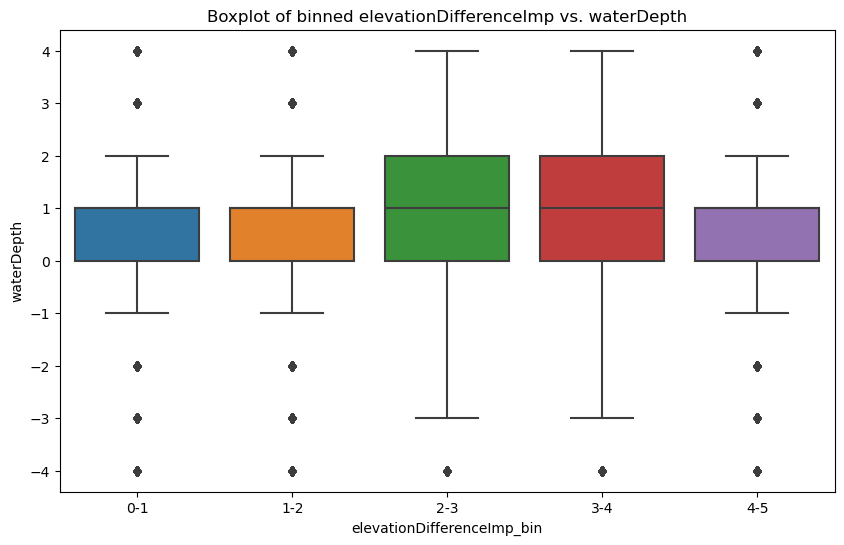

In [516]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='elevationDifferenceImp_bin', y='waterDepth', data=df)
plt.title('Boxplot of binned elevationDifferenceImp vs. waterDepth')
plt.show()


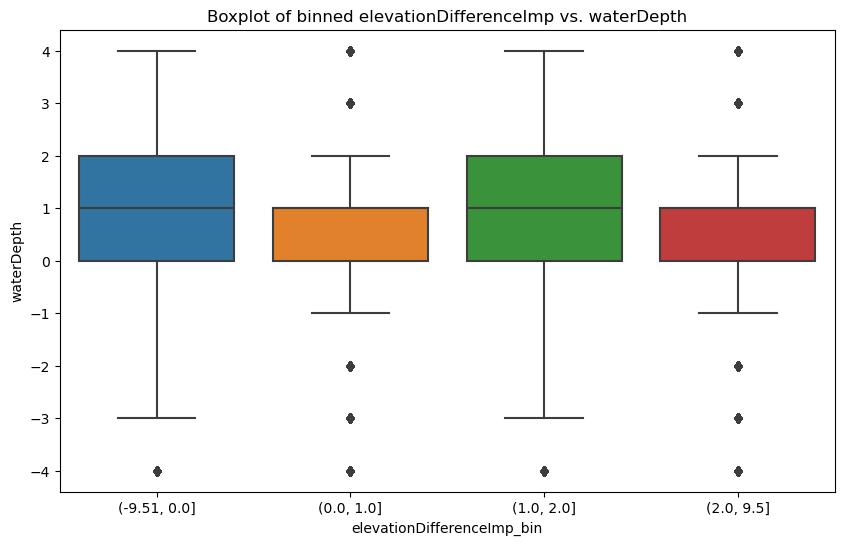

In [519]:


# Determine the number of bins
n_bins = 6

# Calculate quantile bin edges
quantiles = df['elevationDifferenceImp'].quantile([i/n_bins for i in range(n_bins+1)])

# Bin the data using quantiles
df['elevationDifferenceImp_bin'] = pd.cut(df['elevationDifferenceImp'], bins=quantiles, include_lowest=True, precision=2, duplicates='drop')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='elevationDifferenceImp_bin', y='waterDepth', data=df)
plt.title('Boxplot of binned elevationDifferenceImp vs. waterDepth')
plt.show()

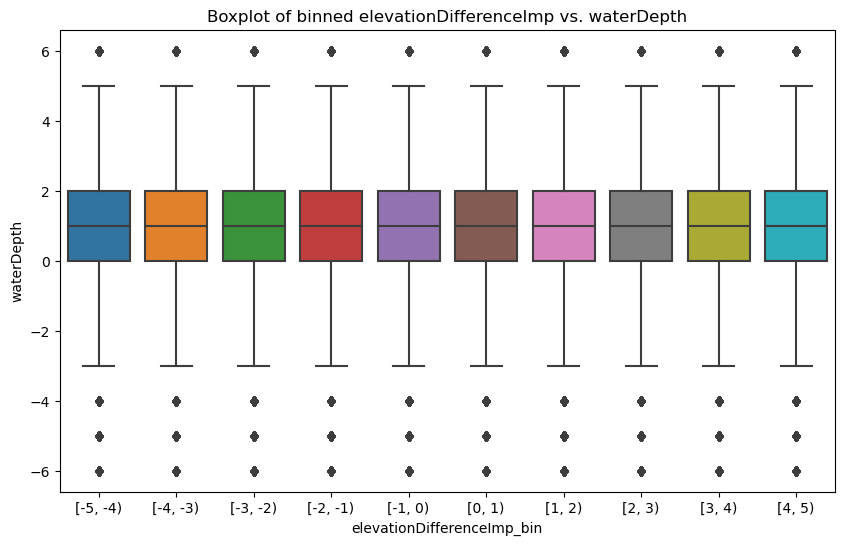

In [524]:


# Define bins from -5 to 5 in 1 unit increments
bins = list(range(-5, 6))

# Bin the data
df['elevationDifferenceImp_bin'] = pd.cut(df['elevationDifferenceImp'], bins=bins, include_lowest=True, right=False)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='elevationDifferenceImp_bin', y='waterDepth', data=df)
plt.title('Boxplot of binned elevationDifferenceImp vs. waterDepth')
plt.show()